# Problem statement

Predict the sales of retail stores

Target: sales
    

We need to predict the sales of the retail stores by traing our model with training dataset and we need to predict the sales of stores in test dataset

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

from itertools import product

### Analysing the datasets

In [2]:
df1=pd.read_csv("date_to_week_id_map.csv")
df1.head(3)


,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49


In [3]:
df2=pd.read_csv("product_prices.csv")
df2.head(3)

,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94


In [4]:
df3=pd.read_csv("train_data.csv")
df3.head(2)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1


In [5]:
df4=pd.read_csv("test_data.csv")
df4.head(2)

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra


In [6]:
#printing the shape of each dataset 
print("Shape of the date_to_week_id_map :",df1.shape)
print("Shape of the product_prices :",df2.shape)
print("Shape of the train_data :",df3.shape)
print("Shape of the test_data :",df4.shape)

Shape of the date_to_week_id_map : (821, 2)
Shape of the product_prices : (59000, 4)
Shape of the train_data : (395000, 7)
Shape of the test_data : (15500, 7)


In [7]:
df_train=df3

In [8]:
df_test=df4

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   date                   395000 non-null  object
 1   product_identifier     395000 non-null  int64 
 2   department_identifier  395000 non-null  int64 
 3   category_of_product    395000 non-null  object
 4   outlet                 395000 non-null  int64 
 5   state                  395000 non-null  object
 6   sales                  395000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 21.1+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15500 non-null  int64 
 1   date                   15500 non-null  object
 2   product_identifier     15500 non-null  int64 
 3   department_identifier  15500 non-null  int64 
 4   category_of_product    15500 non-null  object
 5   outlet                 15500 non-null  int64 
 6   state                  15500 non-null  object
dtypes: int64(4), object(3)
memory usage: 847.8+ KB


In [11]:
# Checking the data types of different features
print(df_train.dtypes)
print('---------------------------------------')
print("Total counts of different data ztypes are : ")
print('---------------------------------------')
print(df_train.dtypes.value_counts())

date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
sales                     int64
dtype: object
---------------------------------------
Total counts of different data ztypes are : 
---------------------------------------
int64     4
object    3
dtype: int64


In [12]:
# Checking the data types of different features
print(df_test.dtypes)
print('---------------------------------------')
print("Total counts of different data ztypes are : ")
print('---------------------------------------')
print(df_test.dtypes.value_counts())

id                        int64
date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
dtype: object
---------------------------------------
Total counts of different data ztypes are : 
---------------------------------------
int64     4
object    3
dtype: int64


In [13]:
df_train.describe()

,product_identifier,department_identifier,outlet,sales
count,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919
std,809.799518,6.337863,91.161291,3.595266
min,74.000000,11.000000,111.000000,0.000000
25%,926.000000,21.000000,113.000000,0.000000
50%,1325.000000,22.000000,221.500000,0.000000
75%,1753.000000,31.000000,331.000000,1.000000
max,3021.000000,33.000000,333.000000,293.000000


In [14]:
df_train.isnull().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
dtype: int64

In [15]:
for col in df_train.columns:
    if df_train[col].dtypes !='object':
        q1=np.percentile(df_train[col],25) 
        q3=np.percentile(df_train[col],75)

        IQR=q3-q1
    
        print('Outliers for :',col,'\n')
  
        upper=q3+1.5*IQR

        lower=q1-1.5*IQR
   
        outliers=[]
    
        for i in df_train[col]:
            if(i<lower or i>upper):
                outliers.append(i)
        print("Outliers are:",outliers)
        print("\n")

Outliers for : product_identifier 

Outliers are: [3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3

In [16]:
## Outliers replace using Mean
q1,q3=df_train['product_identifier'].quantile(0.25),df_train['product_identifier'].quantile(0.75)
iqr = q3 - q1
ll = q1-1.5*iqr
ul = q3 + 1.5*iqr
df_train['product_identifier'] = np.where(df_train['product_identifier']>ul,df_train['product_identifier'].quantile(0.9),df_train['product_identifier'])
df_train['product_identifier'] = np.where(df_train['product_identifier']<ll,df_train['product_identifier'].quantile(0.1),df_train['product_identifier'])


In [17]:
# Detect outlier
# Outlier Detection using Tnter Quantile Range 
Q1=df_train.quantile(0.25)
Q3=df_train.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((df_train<(Q1-1.5*IQR))|(df_train>(Q3+1.5*IQR))).sum()

outlier counter of the all features


category_of_product          0
date                         0
department_identifier        0
outlet                       0
product_identifier           0
sales                    54131
state                        0
dtype: int64

In [18]:
for col in df_train.columns:
    if df_train[col].dtypes !='object':
        q1=np.percentile(df_train[col],25) 
        q3=np.percentile(df_train[col],75)

        IQR=q3-q1
    
        print('Outliers for :',col,'\n')
  
        upper=q3+1.5*IQR

        lower=q1-1.5*IQR
   
        outliers=[]
    
        for i in df_train[col]:
            if(i<lower or i>upper):
                outliers.append(i)
        print("Outliers are:",outliers)
        print("\n")

Outliers for : product_identifier 

Outliers are: []


Outliers for : department_identifier 

Outliers are: []


Outliers for : outlet 

Outliers are: []


Outliers for : sales 

Outliers are: [3, 9, 5, 3, 8, 18, 12, 28, 3, 3, 4, 3, 6, 3, 3, 3, 4, 27, 7, 10, 3, 4, 6, 6, 9, 4, 3, 3, 6, 3, 3, 4, 6, 4, 4, 4, 7, 9, 47, 8, 3, 6, 4, 3, 3, 10, 3, 7, 27, 12, 5, 8, 3, 4, 6, 3, 13, 3, 5, 3, 12, 3, 3, 3, 6, 3, 10, 3, 3, 13, 3, 3, 11, 7, 5, 5, 4, 4, 3, 4, 13, 6, 5, 6, 4, 9, 11, 6, 13, 7, 7, 32, 7, 23, 5, 6, 4, 5, 5, 8, 3, 4, 5, 3, 6, 14, 16, 5, 6, 5, 9, 4, 4, 7, 3, 6, 3, 4, 9, 3, 3, 6, 12, 4, 4, 3, 10, 19, 4, 3, 4, 5, 5, 6, 10, 8, 4, 3, 33, 9, 4, 4, 13, 3, 9, 14, 13, 3, 11, 17, 7, 10, 5, 5, 4, 5, 8, 6, 5, 3, 9, 3, 32, 10, 3, 5, 3, 16, 3, 4, 4, 3, 5, 3, 12, 3, 5, 4, 13, 5, 3, 7, 3, 12, 5, 12, 4, 6, 12, 13, 8, 6, 3, 5, 3, 3, 3, 16, 3, 4, 4, 3, 3, 16, 4, 7, 3, 3, 4, 5, 3, 5, 5, 5, 3, 26, 9, 4, 11, 3, 3, 8, 4, 16, 3, 3, 6, 8, 4, 4, 3, 5, 3, 3, 4, 11, 4, 3, 5, 5, 6, 10, 4, 6, 8, 5, 6, 8, 4, 4, 3, 3, 4,

In [19]:
df_train.describe()

,product_identifier,department_identifier,outlet,sales
count,395000.000000,395000.000000,395000.000000,395000.000000
mean,1500.954000,24.460000,211.200000,1.228919
std,793.729169,6.337863,91.161291,3.595266
min,74.000000,11.000000,111.000000,0.000000
25%,926.000000,21.000000,113.000000,0.000000
50%,1325.000000,22.000000,221.500000,0.000000
75%,1753.000000,31.000000,331.000000,1.000000
max,2935.000000,33.000000,333.000000,293.000000


In [20]:
df_train.dtypes

date                      object
product_identifier       float64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
dtype: object

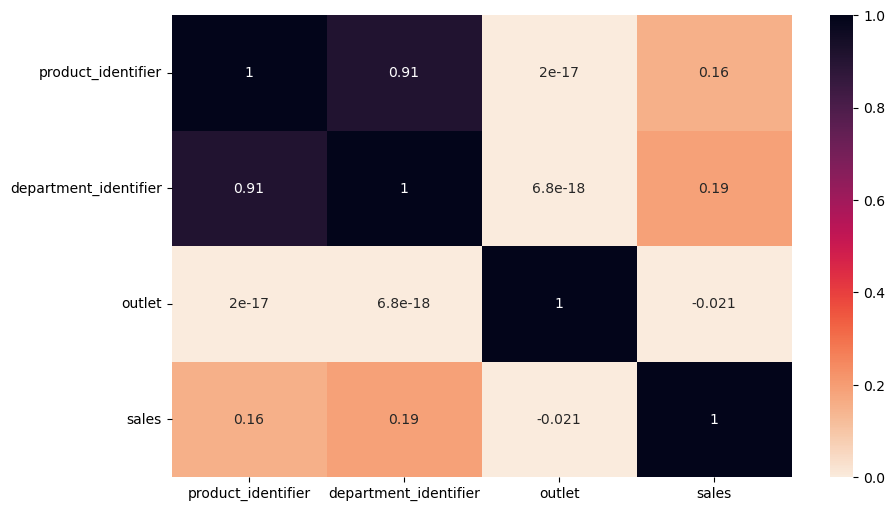

In [21]:
# make figure a bit bigger
plt.figure(figsize=(10,6))

# correlation heatmap
sns.heatmap(df_train.corr(), annot=True, vmin=0, vmax=1, cmap="rocket_r")
plt.show()

In [22]:
df_train.shape

(395000, 7)

In [23]:
df_train.isna().sum()

date                     0
product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
dtype: int64

In [24]:
df_train.dtypes

date                      object
product_identifier       float64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
sales                      int64
dtype: object

In [25]:
df_train['category_of_product'].value_counts()

fast_moving_consumer_goods    229100
drinks_and_food               134300
others                         31600
Name: category_of_product, dtype: int64

In [26]:
df_train['state'].value_counts()

Maharashtra    158000
Telangana      118500
Kerala         118500
Name: state, dtype: int64

In [27]:
cat_cols=df_train.select_dtypes(include=['object']).columns
cat_cols

Index(['date', 'category_of_product', 'state'], dtype='object')

### Converting Categorical features into nuerical features

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    df_train[col]= le.fit_transform(df_train[col])

In [29]:
df_train['category_of_product'].value_counts()

1    229100
0    134300
2     31600
Name: category_of_product, dtype: int64

In [30]:
df_train.dtypes

date                       int64
product_identifier       float64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
dtype: object

In [31]:
df_train=df_train.drop(['date'],axis=1)

In [32]:
df_train.isna().sum()

product_identifier       0
department_identifier    0
category_of_product      0
outlet                   0
state                    0
sales                    0
dtype: int64

In [33]:
df_train.describe()

,product_identifier,department_identifier,category_of_product,outlet,state,sales
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1500.954000,24.460000,0.740000,211.200000,1.000000,1.228919
std,793.729169,6.337863,0.593634,91.161291,0.774598,3.595266
min,74.000000,11.000000,0.000000,111.000000,0.000000,0.000000
25%,926.000000,21.000000,0.000000,113.000000,0.000000,0.000000
50%,1325.000000,22.000000,1.000000,221.500000,1.000000,0.000000
75%,1753.000000,31.000000,1.000000,331.000000,2.000000,1.000000
max,2935.000000,33.000000,2.000000,333.000000,2.000000,293.000000


In [34]:
df_train['sales'].dtypes

dtype('int64')

### Spliting the train data to train and test 

In [35]:
X = df_train.drop(['sales'],axis = 1)
Y = df_train['sales']

In [36]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=30, shuffle=True)

## Importing model for prediction

In [37]:
# create a regressor object
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [38]:
pred = regressor.predict(X_test)
pred

array([1.79719189, 1.05388273, 2.72985782, ..., 1.23642173, 0.16476346,
       0.24440895])

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
mean_squared_error(Y_test,pred)

8.92557323154184

In [41]:
r2_score(Y_test, pred)

0.33582583510037356

# Test

now do the same process to test 

In [42]:
df_test.head()

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     15500 non-null  int64 
 1   date                   15500 non-null  object
 2   product_identifier     15500 non-null  int64 
 3   department_identifier  15500 non-null  int64 
 4   category_of_product    15500 non-null  object
 5   outlet                 15500 non-null  int64 
 6   state                  15500 non-null  object
dtypes: int64(4), object(3)
memory usage: 847.8+ KB


In [44]:
# Checking the data types of different features
print(df_test.dtypes)
print('---------------------------------------')
print("Total counts of different data ztypes are : ")
print('---------------------------------------')
print(df_test.dtypes.value_counts())

id                        int64
date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
dtype: object
---------------------------------------
Total counts of different data ztypes are : 
---------------------------------------
int64     4
object    3
dtype: int64


In [45]:
for col in df_test.columns:
    if df_test[col].dtypes !='object':
        q1=np.percentile(df_test[col],25) 
        q3=np.percentile(df_test[col],75)

        IQR=q3-q1
    
        print('Outliers for :',col,'\n')
  
        upper=q3+1.5*IQR

        lower=q1-1.5*IQR
   
        outliers=[]
    
        for i in df_test[col]:
            if(i<lower or i>upper):
                outliers.append(i)
        print("Outliers are:",outliers)
        print("\n")

Outliers for : id 

Outliers are: []


Outliers for : product_identifier 

Outliers are: [3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008, 3021, 3004, 3008

In [46]:
## Outliers replace using Mean
q1,q3=df_test['product_identifier'].quantile(0.25),df_test['product_identifier'].quantile(0.75)
iqr = q3 - q1
ll = q1-1.5*iqr
ul = q3 + 1.5*iqr
df_test['product_identifier'] = np.where(df_test['product_identifier']>ul,df_test['product_identifier'].quantile(0.9),df_test['product_identifier'])
df_test['product_identifier'] = np.where(df_test['product_identifier']<ll,df_test['product_identifier'].quantile(0.1),df_test['product_identifier'])


In [47]:
for col in df_test.columns:
    if df_test[col].dtypes !='object':
        q1=np.percentile(df_test[col],25) 
        q3=np.percentile(df_test[col],75)

        IQR=q3-q1
    
        print('Outliers for :',col,'\n')
  
        upper=q3+1.5*IQR

        lower=q1-1.5*IQR
   
        outliers=[]
    
        for i in df_test[col]:
            if(i<lower or i>upper):
                outliers.append(i)
        print("Outliers are:",outliers)
        print("\n")

Outliers for : id 

Outliers are: []


Outliers for : product_identifier 

Outliers are: []


Outliers for : department_identifier 

Outliers are: []


Outliers for : outlet 

Outliers are: []




In [48]:
df_test.describe()

,id,product_identifier,department_identifier,outlet
count,15500.000000,15500.000000,15500.000000,15500.000000
mean,7750.500000,1500.954000,24.460000,211.200000
std,4474.608921,793.753769,6.338059,91.164117
min,1.000000,74.000000,11.000000,111.000000
25%,3875.750000,926.000000,21.000000,113.000000
50%,7750.500000,1325.000000,22.000000,221.500000
75%,11625.250000,1753.000000,31.000000,331.000000
max,15500.000000,2935.000000,33.000000,333.000000


In [49]:
df_train.head(1)

,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,74.0,11,2,111,1,0


In [50]:
df_test.head(1)

,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74.0,11,others,111,Maharashtra


In [51]:
X.shape

(395000, 5)

In [52]:
df_test.shape

(15500, 7)

In [53]:
df_test=df_test.drop(['date','id'],axis = 1)

In [54]:
df_test.shape

(15500, 5)

In [55]:
df_test.dtypes

product_identifier       float64
department_identifier      int64
category_of_product       object
outlet                     int64
state                     object
dtype: object

In [56]:
X.shape

(395000, 5)

In [57]:
cat_cols=df_test.select_dtypes(include=['object']).columns
cat_cols

Index(['category_of_product', 'state'], dtype='object')

In [58]:
df_test['category_of_product'].value_counts()

fast_moving_consumer_goods    8990
drinks_and_food               5270
others                        1240
Name: category_of_product, dtype: int64

In [59]:
for col in cat_cols:
    df_test[col]= le.fit_transform(df_test[col])

In [60]:
df_test['category_of_product'].value_counts()

1    8990
0    5270
2    1240
Name: category_of_product, dtype: int64

In [61]:
df_train.dtypes

product_identifier       float64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
sales                      int64
dtype: object

In [62]:
df_test.dtypes

product_identifier       float64
department_identifier      int64
category_of_product        int64
outlet                     int64
state                      int64
dtype: object

In [63]:
test_pred=regressor.predict(df_test)

In [64]:
test_pred

array([0.44126984, 2.14937107, 0.33744222, ..., 1.83748015, 1.83748015,
       1.83748015])